In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
#the three algorithms I will be using
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
import pandas as pd
#review lecture 16
#scikit-learn
    #try 3 different algorithims
    #normalize data

In [2]:
#importing datasets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Data Processing


In [5]:
#splitting 'datetime' column with converting to object
#log count column to remove skewniss
#eliminate outliers
#min/max scaling of the numeric columns

In [6]:
#converting the datime column to each elements(year, month, day, dayofweek, hour)
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
#splitting datetime to year, month, day
def split_datetime(df):
    #extracting the year
    df['year'] = df['datetime'].apply(lambda t:t.year)
    #extracting the month
    df['month'] = df['datetime'].apply(lambda t:t.month)
    #extracting the day
    df['day'] = df['datetime'].apply(lambda t:t.day)
    #extracting the day of the week
    df['dayofweek'] = df['datetime'].apply(lambda t:t.dayofweek)
    #extracting the hour
    df['hour'] = df['datetime'].apply(lambda t:t.hour)
    df = df.drop(['datetime'], axis= 1)
    return df

In [8]:
train = split_datetime(train)
test = split_datetime(test)
train = train.drop(['casual', 'registered'],axis =1)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,5,4


# Visualizations for the datetime features


<AxesSubplot: xlabel='hour', ylabel='count'>

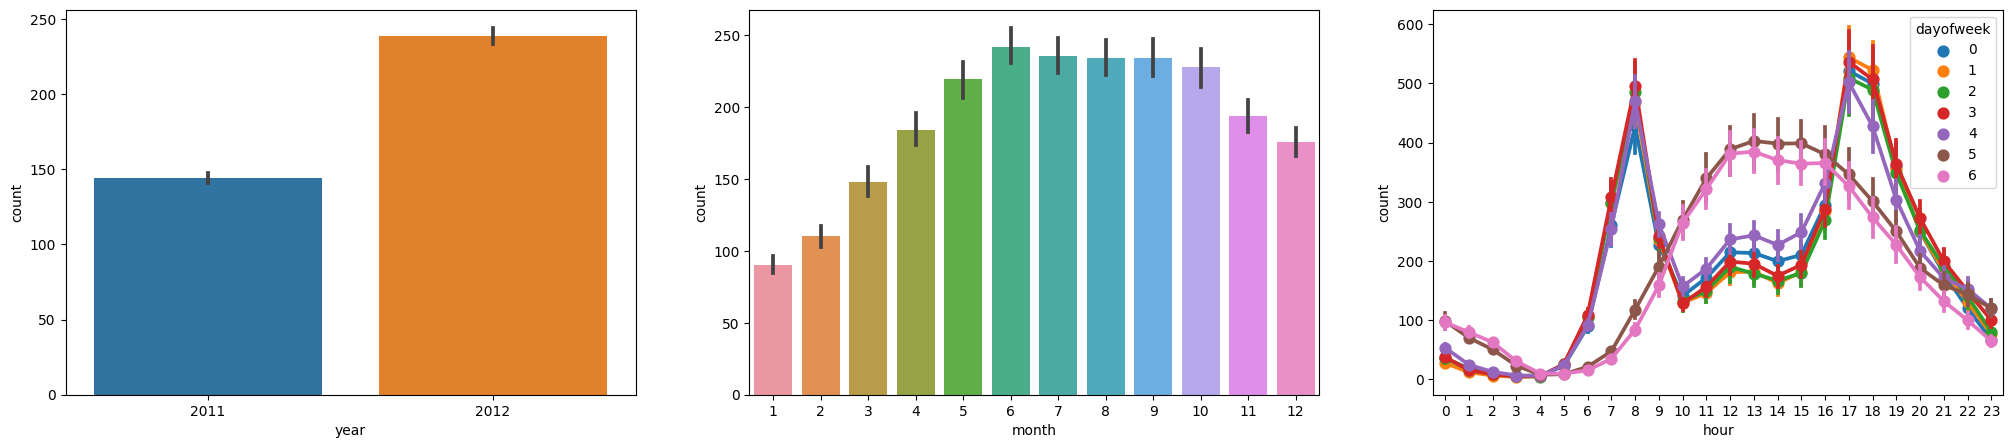

In [9]:
fig, axis = plt.subplots(nrows=1,ncols=3)
fig.set_size_inches(25,5)
sns.barplot(data = train, x = 'year', y = 'count', ax = axis[0])
sns.barplot(data = train, x = 'month', y = 'count', ax = axis[1])
sns.pointplot(data = train, x = 'hour', y = 'count', ax = axis[2], hue = 'dayofweek')

from the year barplot that in year 2012 there was significantly more bike riders compared to the year 2011
from the month barplot we see that the month June has the most bike riders and the month January has the least bike riders
for the hour point plot we see that with time increases throughout the day, the number of bike riders increases, we see a peak for the morning and evening in the weekdays and a peak in the middle of the day for the weekdays

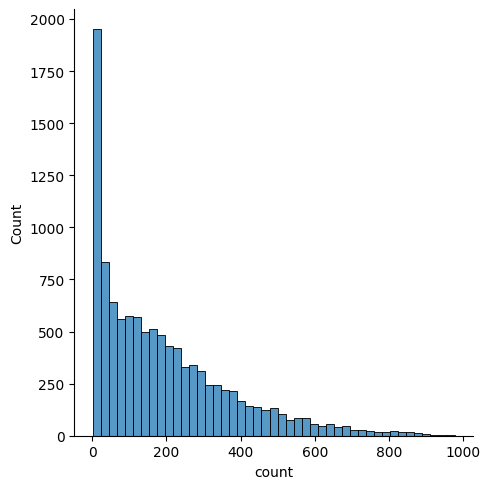

In [10]:
sns.displot(train['count'])

the data appears to be very skewed, to remove skewness the log of the count will be applied

In [11]:
train['count']=np.log(train['count'])

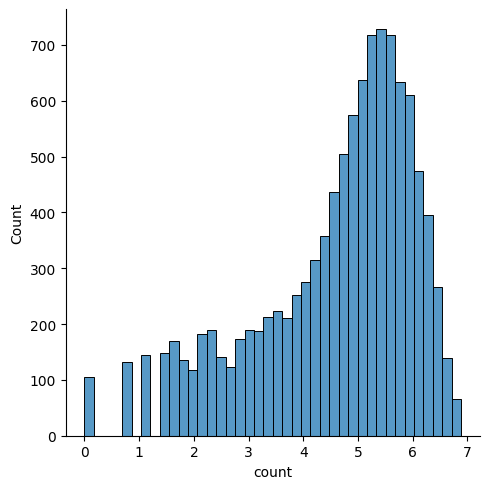

In [12]:
sns.displot(train['count'])

The skewness is alot less significant and the data is more normalized, now removing the outliers will help even more

In [13]:
#removing outliers with (std dev. of 3)
#calculating the residuals by finding the difference of the abs value of each feature and subtracting it from the mean
train = train[np.abs(train['count'])-train['count'].mean()<=(3*train['count'].std())]

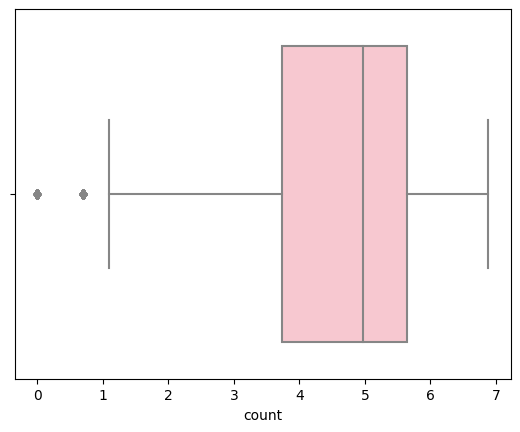

In [14]:
sns.boxplot(x='count', data = train, color = 'pink')
plt.show()

this is much better,  only a few outliers are left....


In [15]:
# fields = [f for f in train]
# fields = fields[5:-3]

In [16]:
# fig = plt.figure(figsize=(15,15))
# for i, f1 in enumerate(fields):
#     for j, f2 in enumerate(fields):
#         idx = i*len(fields)+i+1
#         ax = fig.add_subplot(len(fields),len(fields),idx)
#         ax.scatter(train[f1],train[f2])
#         ax.set_ylabel(f1)
#         ax.set_xlabel(f2)
# plt.show()

In [17]:
# #dropping outliers running the previous code allows us to see what to drop
# drop_idx = train[(train['atemp']>20 &(train['atemp']<40)&(train['temp']>10)&(train['temp']<20))].index
# train = train.drop(drop_idx)

In [18]:
#standard scaling numeric columns
from sklearn.preprocessing import MinMaxScaler
def scaling(df):
    scaler = MinMaxScaler()
    num_cols = ['temp', 'atemp', 'humidity', 'windspeed']
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df    

In [19]:
train = scaling(train)
test = scaling(test)

In [20]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,dayofweek,hour
0,1,0,0,1,0.224490,0.305068,0.81,0.0,2.772589,2011,1,1,5,0
1,1,0,0,1,0.204082,0.288064,0.80,0.0,3.688879,2011,1,1,5,1
2,1,0,0,1,0.204082,0.288064,0.80,0.0,3.465736,2011,1,1,5,2
3,1,0,0,1,0.224490,0.305068,0.75,0.0,2.564949,2011,1,1,5,3
4,1,0,0,1,0.224490,0.305068,0.75,0.0,0.000000,2011,1,1,5,4


the data has been scaled from 0 to 1

In [21]:
#splitting train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(train.drop(['count'], axis = 1), train['count'], test_size=0.3)

# Defining a Metric (Root Mean Squal Log Error (RMSL))

In [22]:
def rmsle(y, pred):
    log_y=np.log1p(y)
    log_pred=np.log1p(pred)
    squared_error=(log_y-log_pred)**2
    rmsle=np.sqrt(np.mean(squared_error))
    return rmsle

# Model Selections
The 3 ML models I chose to use was
 * Linear Regression 
 * RandomForestRegressor
 * LGMBRegressor 

# Looking over the RSMLE error values of the models

In [50]:
#for choosing the best parameters
from sklearn.model_selection import GridSearchCV

In [51]:
#a function for evaluating each model and its parameters
def evaluate(reg_cls, params = None):
    reg = reg_cls()
    if params:
        reg = GridSearchCV(reg, param_grid=params, refit = True)
    reg.fit(x_train, y_train)
    pred=reg.predict(x_test)
    
    y_test_exp = np.expm1(y_test)
    pred_exp = np.expm1(pred)
    print('\n', reg_cls)
    if params:
        print(reg.best_params_)
        reg = reg.best_estimator_
    print(rmsle(y_test_exp,pred_exp))
    return reg, pred_exp

In [25]:
# params = {'n_estimators':[100*1 for i in range(1,6)]}

* Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr_reg,pred_lr = evaluate(LinearRegression)


 <class 'sklearn.linear_model._base.LinearRegression'>
1.0762005118946756


* RandomForestRegressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rf_reg,pred_rf = evaluate(RandomForestRegressor)


 <class 'sklearn.ensemble._forest.RandomForestRegressor'>
0.3389129572301837


* LGMBRegressor

In [30]:
# pip install lightgbm

In [31]:
from lightgbm import LGBMRegressor

In [32]:
lg_reg,pred_lg = evaluate(LGBMRegressor)


 <class 'lightgbm.sklearn.LGBMRegressor'>
0.32138335330531576


# Finding which features to focus on/which feature is most important

In [33]:
def feature_importance(reg):
    plt.figure(figsize=(20,10))
    print(type(reg))
    df = pd.DataFrame(sorted(zip(x_train.columns,reg.feature_importances_)), columns = ['features', 'values'])
    sns.barplot(x='values', y ='features', data=df.sort_values(by='values', ascending = False))
    plt.show()

<class 'lightgbm.sklearn.LGBMRegressor'>


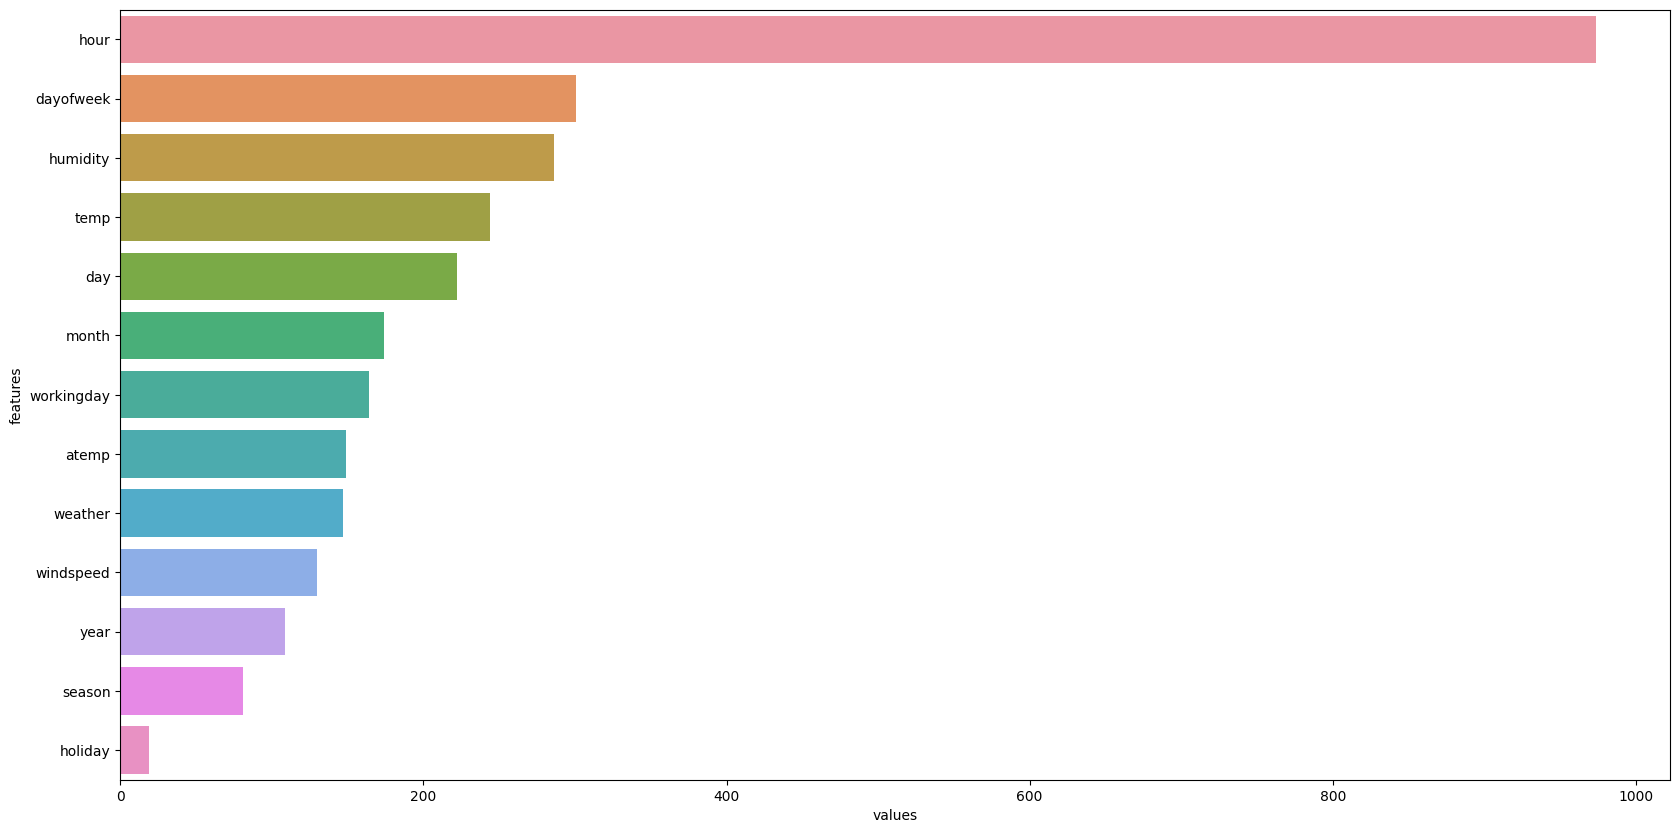

In [34]:
feature_importance(lg_reg)

<class 'sklearn.ensemble._forest.RandomForestRegressor'>


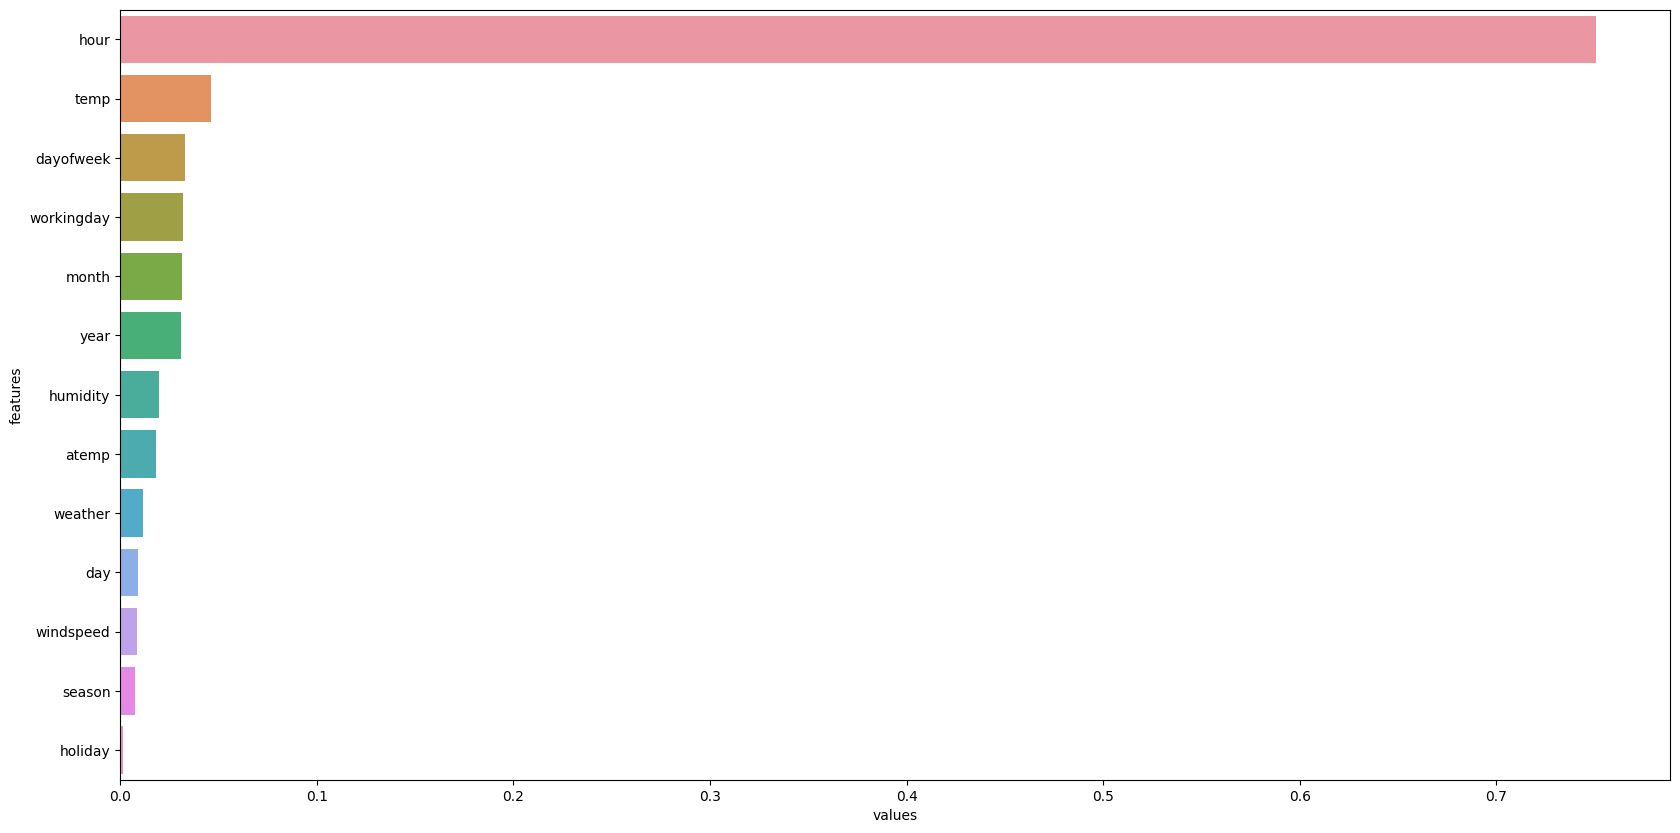

In [35]:
feature_importance(rf_reg)

<class 'lightgbm.sklearn.LGBMRegressor'>


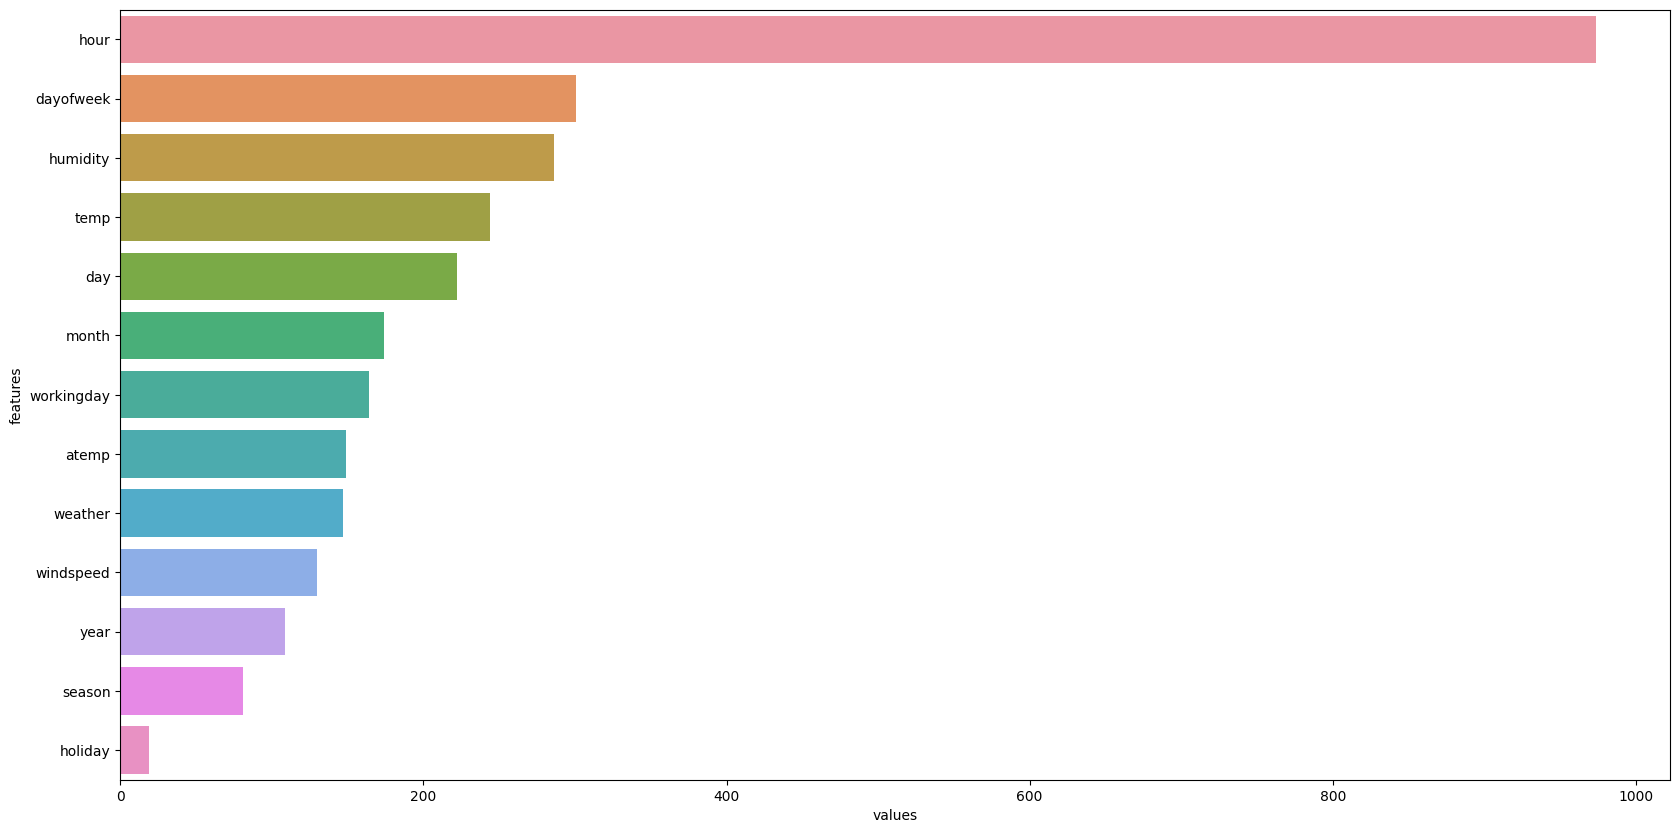

In [36]:
feature_importance(lg_reg)

* From these figures we can see that the hour is the most important feature to look at 

# Linear Regression

In [37]:
pred1 = lr_reg.predict(test)
pred1_exp = np.expm1(pred1)
print(pred1_exp)

[ 12.51829531  12.81035321  14.31072473 ... 355.80889702 429.20411481
 405.32802959]


In [38]:
submit1 = pd.read_csv('sampleSubmission.csv')
submit1.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [39]:
submit1.loc[:, 'count'] = pred1_exp
submit1

,datetime,count
0,2011-01-20 00:00:00,12.518295
1,2011-01-20 01:00:00,12.810353
2,2011-01-20 02:00:00,14.310725
3,2011-01-20 03:00:00,16.690199
4,2011-01-20 04:00:00,18.612082
...,...,...
6488,2012-12-31 19:00:00,286.697154
6489,2012-12-31 20:00:00,317.952880
6490,2012-12-31 21:00:00,355.808897
6491,2012-12-31 22:00:00,429.204115


# RandomForestRegressor


In [46]:
pred2 = lg_reg.predict(test)
pred2_exp = np.expm1(pred2)
print(pred2_exp)

[  9.81923225   4.87395998   2.71569668 ... 128.9774787   88.65504909
  60.42599153]


In [42]:
submit2 = pd.read_csv('sampleSubmission.csv')
submit2.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [43]:
submit2.loc[:, 'count'] = pred2_exp
submit2

,datetime,count
0,2011-01-20 00:00:00,12.191758
1,2011-01-20 01:00:00,4.386238
2,2011-01-20 02:00:00,4.069823
3,2011-01-20 03:00:00,2.090323
4,2011-01-20 04:00:00,1.141620
...,...,...
6488,2012-12-31 19:00:00,257.052693
6489,2012-12-31 20:00:00,196.378248
6490,2012-12-31 21:00:00,137.071391
6491,2012-12-31 22:00:00,104.954466


#  LGMBRegressor 

In [47]:
pred3 = lg_reg.predict(test)
pred3_exp = np.expm1(pred3)
print(pred3_exp)

[  9.81923225   4.87395998   2.71569668 ... 128.9774787   88.65504909
  60.42599153]


In [48]:
submit3 = pd.read_csv('sampleSubmission.csv')
submit3.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [49]:
submit3.loc[:, 'count'] = pred3_exp
submit3

,datetime,count
0,2011-01-20 00:00:00,9.819232
1,2011-01-20 01:00:00,4.873960
2,2011-01-20 02:00:00,2.715697
3,2011-01-20 03:00:00,1.778242
4,2011-01-20 04:00:00,1.621013
...,...,...
6488,2012-12-31 19:00:00,253.734677
6489,2012-12-31 20:00:00,178.653797
6490,2012-12-31 21:00:00,128.977479
6491,2012-12-31 22:00:00,88.655049
